# Jonathan Halverson
# Thursday, February 23, 2017
# Part 4: Winning percentage by age of UFC fights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
fights = pd.read_csv('fightmetric_cards/fightmetric_fights.csv', header=0, parse_dates=['Date'])
fights.head(5)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
3,Glover Teixeira,def.,Jared Cannonier,Light Heavyweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
4,Dustin Poirier,def.,Jim Miller,Lightweight,M-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [3]:
fights.shape

(4068, 11)

In [4]:
fighters = pd.read_csv('fightmetric_fighters/fightmetric_fighters.csv', header=0, parse_dates=['Dob'])
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')
fighters.head(5)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
0,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,5.0,3.0,0.0,0,Tom Aaron,1978-07-13,38.620916
1,Danny,Abbadi,The Assassin,71.0,155.0,NaN,Orthodox,4.0,6.0,0.0,0,Danny Abbadi,1983-07-03,33.648877
2,David,Abbott,Tank,72.0,265.0,NaN,Switch,10.0,14.0,0.0,0,David Abbott,NaT,NaN
3,Shamil,Abdurakhimov,Abrek,75.0,235.0,76.0,Orthodox,16.0,4.0,0.0,0,Shamil Abdurakhimov,1981-09-02,35.480537
4,Hiroyuki,Abe,Abe Ani,66.0,145.0,NaN,Orthodox,8.0,14.0,3.0,0,Hiroyuki Abe,NaT,NaN


Remember to remove draws, etc.

In [5]:
cols = ['Name', 'Height', 'Reach', 'Stance', 'Dob', 'Age']
df = fights.merge(fighters[cols], how='inner', left_on='Winner', right_on='Name')
df.shape

(4088, 17)

In [6]:
df.head()

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Name,Height,Reach,Stance,Dob,Age
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Germaine de Randamie,69.0,71.0,Orthodox,1984-04-24,32.838457
1,Germaine de Randamie,def.,Anna Elmose,Women's Bantamweight,KO/TKO,Knee,1,3:46,UFC Fight Night: Overeem vs Arlovski,2016-05-08,"Rotterdam, Zuid-Holland, Netherlands",Germaine de Randamie,69.0,71.0,Orthodox,1984-04-24,32.838457
2,Germaine de Randamie,def.,Larissa Pacheco,Women's Bantamweight,KO/TKO,Punch,2,2:02,UFC 185: Pettis vs Dos Anjos,2015-03-14,"Dallas, Texas, USA",Germaine de Randamie,69.0,71.0,Orthodox,1984-04-24,32.838457
3,Germaine de Randamie,def.,Julie Kedzie,Women's Bantamweight,S-DEC,NaN,3,5:00,UFC on Fox: Johnson vs Moraga,2013-07-27,"Seattle, Washington, USA",Germaine de Randamie,69.0,71.0,Orthodox,1984-04-24,32.838457
4,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Anderson Silva,74.0,77.0,Southpaw,1975-04-14,41.868074


In [7]:
df = df.merge(fighters[cols], how='inner', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df.shape

(4097, 23)

In [8]:
df

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Reach,Stance,Dob,Age,Name_L,Height_L,Reach_L,Stance_L,Dob_L,Age_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,71.0,Orthodox,1984-04-24,32.838457,Holly Holm,68.0,69.0,Southpaw,1981-10-17,35.357331
1,Valentina Shevchenko,def.,Holly Holm,Women's Bantamweight,U-DEC,NaN,5,5:00,UFC Fight Night: Holm vs. Shevchenko,2016-07-23,...,67.0,Southpaw,1988-03-07,28.969794,Holly Holm,68.0,69.0,Southpaw,1981-10-17,35.357331
2,Miesha Tate,def.,Holly Holm,Women's Bantamweight,SUB,Rear Naked Choke,5,3:30,UFC 196: McGregor vs Diaz,2016-03-05,...,65.0,Orthodox,1986-08-18,30.522187,Holly Holm,68.0,69.0,Southpaw,1981-10-17,35.357331
3,Germaine de Randamie,def.,Anna Elmose,Women's Bantamweight,KO/TKO,Knee,1,3:46,UFC Fight Night: Overeem vs Arlovski,2016-05-08,...,71.0,Orthodox,1984-04-24,32.838457,Anna Elmose,63.0,65.0,Orthodox,1984-10-06,32.386702
4,Amanda Cooper,def.,Anna Elmose,Women's Strawweight,U-DEC,NaN,3,5:00,UFC Fight Night: Mousasi vs. Hall 2,2016-11-19,...,64.0,Switch,1991-10-22,25.344805,Anna Elmose,63.0,65.0,Orthodox,1984-10-06,32.386702
5,Germaine de Randamie,def.,Larissa Pacheco,Women's Bantamweight,KO/TKO,Punch,2,2:02,UFC 185: Pettis vs Dos Anjos,2015-03-14,...,71.0,Orthodox,1984-04-24,32.838457,Larissa Pacheco,67.0,69.0,Orthodox,1994-09-07,22.467265
6,Jessica Andrade,def.,Larissa Pacheco,Women's Bantamweight,SUB,Guillotine Choke,1,4:33,UFC Fight Night: Silva vs Arlovski,2014-09-13,...,62.0,Orthodox,1991-09-25,25.418729,Larissa Pacheco,67.0,69.0,Orthodox,1994-09-07,22.467265
7,Germaine de Randamie,def.,Julie Kedzie,Women's Bantamweight,S-DEC,NaN,3,5:00,UFC on Fox: Johnson vs Moraga,2013-07-27,...,71.0,Orthodox,1984-04-24,32.838457,Julie Kedzie,65.0,64.0,Orthodox,1981-03-18,35.940505
8,Bethe Correia,def.,Julie Kedzie,Women's Bantamweight,S-DEC,NaN,3,5:00,UFC Fight Night: Hunt vs Bigfoot,2013-12-06,...,64.0,Orthodox,1983-06-22,33.678994,Julie Kedzie,65.0,64.0,Orthodox,1981-03-18,35.940505
9,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,77.0,Southpaw,1975-04-14,41.868074,Derek Brunson,73.0,77.0,Southpaw,1984-01-04,33.142364


In [9]:
df[df.Dob - df.Dob_L > np.timedelta64(5, 'Y')]

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Reach,Stance,Dob,Age,Name_L,Height_L,Reach_L,Stance_L,Dob_L,Age_L
1,Valentina Shevchenko,def.,Holly Holm,Women's Bantamweight,U-DEC,NaN,5,5:00,UFC Fight Night: Holm vs. Shevchenko,2016-07-23,...,67.0,Southpaw,1988-03-07,28.969794,Holly Holm,68.0,69.0,Southpaw,1981-10-17,35.357331
4,Amanda Cooper,def.,Anna Elmose,Women's Strawweight,U-DEC,NaN,3,5:00,UFC Fight Night: Mousasi vs. Hall 2,2016-11-19,...,64.0,Switch,1991-10-22,25.344805,Anna Elmose,63.0,65.0,Orthodox,1984-10-06,32.386702
10,Robert Whittaker,def.,Derek Brunson,Middleweight,KO/TKO,Kick,1,4:07,UFC Fight Night: Whittaker vs. Brunson,2016-11-26,...,73.0,Orthodox,1990-12-20,26.182605,Derek Brunson,73.0,77.0,Southpaw,1984-01-04,33.142364
20,Jon Jones,def.,Stephan Bonnar,Light Heavyweight,U-DEC,NaN,3,5:00,UFC 94: St-Pierre vs Penn 2,2009-01-31,...,84.0,Orthodox,1987-07-19,29.604988,Stephan Bonnar,76.0,78.0,Orthodox,1977-04-04,39.894043
29,Jon Jones,def.,Chael Sonnen,Light Heavyweight,KO/TKO,Punches,1,4:33,UFC 159: Jones vs Sonnen,2013-04-27,...,84.0,Orthodox,1987-07-19,29.604988,Chael Sonnen,73.0,74.0,Southpaw,1977-04-03,39.896781
40,Gegard Mousasi,def.,Vitor Belfort,Middleweight,KO/TKO,Punches,2,2:43,UFC 204: Bisping vs. Henderson,2016-10-08,...,76.0,Orthodox,1985-08-01,31.568068,Vitor Belfort,72.0,74.0,Southpaw,1977-04-01,39.902257
41,Jon Jones,def.,Vitor Belfort,Light Heavyweight,SUB,Keylock,4,0:54,UFC 152: Jones vs Belfort,2012-09-22,...,84.0,Orthodox,1987-07-19,29.604988,Vitor Belfort,72.0,74.0,Southpaw,1977-04-01,39.902257
42,Chris Weidman,def.,Vitor Belfort,Middleweight,KO/TKO,Punches,1,2:53,UFC 187: Johnson vs Cormier,2015-05-23,...,78.0,Orthodox,1984-06-17,32.690610,Vitor Belfort,72.0,74.0,Southpaw,1977-04-01,39.902257
49,Chris Weidman,def.,Demian Maia,Middleweight,U-DEC,NaN,3,5:00,UFC on FOX: Evans vs Davis,2012-01-28,...,78.0,Orthodox,1984-06-17,32.690610,Demian Maia,73.0,72.0,Southpaw,1977-11-06,39.302655
51,Rory MacDonald,def.,Demian Maia,Welterweight,U-DEC,NaN,3,5:00,UFC 170: Rousey vs McMann,2014-02-22,...,76.0,Orthodox,1989-07-22,27.595365,Demian Maia,73.0,72.0,Southpaw,1977-11-06,39.302655


In [10]:
wins = df[(df.Outcome == 'def.') & (df.Date > np.datetime64('2005-01-01')) & pd.notnull(df.Dob) & pd.notnull(df.Dob_L)].copy()
wins['Age'] = (wins.Date - wins.Dob) / np.timedelta64(1, 'Y')
wins['Age_L'] = (wins.Date - wins.Dob_L) / np.timedelta64(1, 'Y')

In [11]:
msk1 = wins.Age < 25
msk2 = wins.Age_L < 25
under25 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
under25

0.6259445843828715

In [12]:
wins[msk1].shape[0], wins[msk2].shape[0]

(497, 373)

In [13]:
msk1 = (wins.Age >= 25) & (wins.Age <= 29)
msk2 = (wins.Age_L >= 25) & (wins.Age_L <= 29)
over25under30 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over25under30

0.6305343511450382

In [14]:
wins[msk1].shape[0], wins[msk2].shape[0]

(1239, 1121)

In [15]:
msk1 = (wins.Age >= 30) & (wins.Age <= 35)
msk2 = (wins.Age_L >= 30) & (wins.Age_L <= 35)
over30under35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over30under35

0.5825958702064897

In [16]:
wins[msk1].shape[0], wins[msk2].shape[0]

(1185, 1315)

In [17]:
msk1 = wins.Age > 35
msk2 = wins.Age_L > 35
over35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over35

0.47342995169082125

In [18]:
wins[msk1].shape[0], wins[msk2].shape[0]

(294, 399)

In [19]:
wins[msk1 & msk2][['Name', 'Name_L', 'Age', 'Age_L']].shape[0]

72

In [20]:
msk1 = (wins.Age > 35) & (wins.Age_L < 35)
msk2 = (wins.Age_L > 35) & (wins.Age < 35)
over35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over35

0.40437158469945356

In [21]:
wins[msk1].shape[0], wins[msk2].shape[0]

(222, 327)

In [22]:
wins.Age = wins.Age.astype(int)
wins.Age_L = wins.Age_L.astype(int)
x=wins.Age.value_counts()/(wins.Age.value_counts() + wins.Age_L.value_counts())

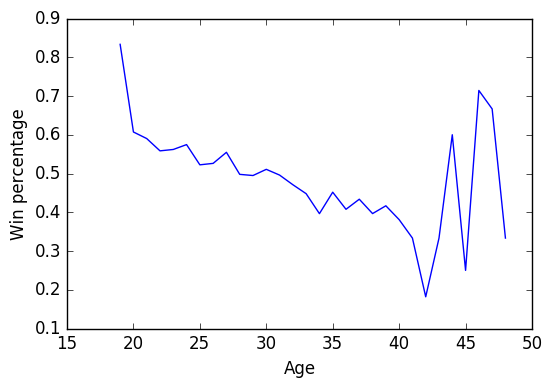

In [23]:
plt.plot(x.index, x.values)
plt.xlabel('Age')
plt.ylabel('Win percentage')

In [24]:
wins.Age.value_counts() + wins.Age_L.value_counts()

18      NaN
19      6.0
20     28.0
21     61.0
22    154.0
23    258.0
24    362.0
25    469.0
26    574.0
27    640.0
28    677.0
29    671.0
30    652.0
31    613.0
32    518.0
33    384.0
34    333.0
35    228.0
36    184.0
37    113.0
38     58.0
39     36.0
40     21.0
41     12.0
42     11.0
43      6.0
44      5.0
45      4.0
46      7.0
47      3.0
48      3.0
50      NaN
51      NaN
dtype: float64

In [25]:
x

18         NaN
19    0.833333
20    0.607143
21    0.590164
22    0.558442
23    0.562016
24    0.574586
25    0.522388
26    0.526132
27    0.554688
28    0.497784
29    0.494784
30    0.510736
31    0.495922
32    0.471042
33    0.447917
34    0.396396
35    0.451754
36    0.407609
37    0.433628
38    0.396552
39    0.416667
40    0.380952
41    0.333333
42    0.181818
43    0.333333
44    0.600000
45    0.250000
46    0.714286
47    0.666667
48    0.333333
50         NaN
51         NaN
dtype: float64